<a href="https://colab.research.google.com/github/geohemex/DDP/blob/master/text_voice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.8 MB/s eta 0:00:00


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore, CoherenceModel, Phrases
from gensim.models.phrases import Phrases, Phraser
import pyLDAvis.gensim_models
from gensim.models import Word2Vec
pyLDAvis.enable_notebook()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [5]:
file_path = ('/content/drive/My Drive/Data/avan/text_voice.csv')
df_text_voice = pd.read_csv(file_path, low_memory=False, header=0)
print(df_text_voice)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                         desc_recording_transcription
0   Thank you for calling Central Main Power. This...
1   Thank you for calling you. I, this is Courtney...
2   Thank you for calling Connecticut Natural Adap...
3   Thank you for calling customer service. This i...
4   Thank you for calling UY. This is George. I ma...
5   Thank you for calling customer service. My nam...
6   Outage response team, this is Kelly. How can I...
7   Thank you for calling Connecticut Natural Guid...
8   Thank you for calling customer service. This i...
9   Thank you for calling UI. This is Malika speak...
10  Thank you for calling. I said customer service...
11  I think if we're calling for domain power, thi...
12  Thank you for calling customer service. This i...
13  Thank you for calling customer service. This i...
14  Thank you for calling Southern Connecticut Gas...
15  Thank you for calling customer service. This i...
16  Thank you for calling Berkshire Gas. This is K...
17  Thank you for calling cu

In [146]:
import re
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_nan_lists(element):
    if isinstance(element, list) and element == ['nan']:
        return np.nan
    else:
        return element

#tags_removal= {'ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM'}
#tags_removal = {'RB', 'PRP', 'CC', ',', ':', 'IN', 'CD', 'SYM', 'TO', 'DT'}
tags_removal = { 'PRP', 'CC', ',', ':', 'IN', 'CD', 'SYM', 'TO'}


phrases_to_remove = [
    "thank you for calling",
    "customer service"
]

def remove_phrases(text, phrases):
    for phrase in phrases:
        # Use regex to remove the phrase, case-insensitive
        pattern = re.compile(re.escape(phrase), re.IGNORECASE)
        text = pattern.sub('', text)
    return text

df_text_voice['desc_recording_transcription'] = df_text_voice['desc_recording_transcription'].apply(
    lambda x: remove_phrases(x, phrases_to_remove)
)

df_text_voice['docs'] = df_text_voice['desc_recording_transcription'].apply(
    lambda x: [lemmatizer.lemmatize(t[0].lower(), get_wordnet_pos(t[1])) for t in pos_tag(word_tokenize(x))
               if t[0].lower() not in stop_words and t[0].isalpha() and t[1] not in tags_removal]
)


df_text_voice['docs'] = df_text_voice['docs'].apply(clean_nan_lists)
df_text_voice.dropna(subset=['docs'], inplace=True)
df_text_voice['docs'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,docs
0,"[central, main, power, sean, may, help, oh, ye..."
1,"[courtney, help, courtney, go, see, arrange, t..."
2,"[connecticut, natural, adapts, name, paula, ma..."
3,"[scott, may, help, okay, happy, help, account,..."
4,"[uy, george, may, help, oh, yes, george, good,..."


**min_count in Phrases**:

Controls how many times a pair or group of words must appear together to be merged into a trigram.
Scope: Works at the level of n-grams (word pairs or triples).

**min_count in Word2Vec:**

Controls how many times a single word must appear in the corpus to be included in the vocabulary for word embeddings.
Scope: Works at the level of individual words.

**no_below in Dictionary:**

Filters out words that appear in fewer than a certain number of documents (in this case, 2 documents), affecting the words included in the dictionary and the corpus representation.
Scope: Works at the level of document frequency (how many documents a word appears in).

In [147]:
from gensim.utils import simple_preprocess

# Convert raw documents to unigrams
df_text_voice['docs_unigram'] = df_text_voice['desc_recording_transcription'].apply(lambda x: simple_preprocess(x))

# Create bigrams
bigram_model = Phrases(df_text_voice['docs_unigram'], min_count=10, threshold=100)
bigram_phraser = Phraser(bigram_model)
df_text_voice['docs_bigram'] = df_text_voice['docs_unigram'].apply(lambda x: bigram_phraser[x])

# Create trigrams
trigram_model = Phrases(df_text_voice['docs_bigram'], min_count=10, threshold=100) #numero de veces que tenga que aparecer el n-grama
trigram_phraser = Phraser(trigram_model)
df_text_voice['docs_trigram'] = df_text_voice['docs_bigram'].apply(lambda x: trigram_phraser[x])

# Create dictionary and corpus
dictionary = Dictionary(df_text_voice['docs_trigram'])
dictionary.filter_extremes(no_below=2, no_above=0.7) # porcentaje qie tiene que estar en el cuerpo del texto
corpus = [dictionary.doc2bow(doc) for doc in df_text_voice['docs_trigram'].tolist()]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [144]:
trigram_model = Phrases(df_text_voice['docs_bigram'], min_count=10, threshold=20) #num 10, threshold 50
trigram_phraser = Phraser(trigram_model)
df_text_voice['docs_trigram'] = df_text_voice['docs_bigram'].apply(lambda x: trigram_phraser[x])

# Train Word2Vec model
model = Word2Vec(
    sentences=df_text_voice['docs_trigram'],
    vector_size=100,
    window=5,
    min_count=10,
    workers=4
)

dictionary = Dictionary(df_text_voice['docs_trigram'])
dictionary.filter_extremes(no_below=5, no_above=0.7)
corpus = [dictionary.doc2bow(doc) for doc in df_text_voice['docs_trigram'].tolist()]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [143]:
from collections import defaultdict

# Count trigram frequencies
trigram_freq = defaultdict(int)
for doc in df_text_voice['docs_trigram']:
    for trigram in doc:
        if '_' in trigram:
            trigram_freq[trigram] += 1

# Display top 20 trigrams
top_trigrams = sorted(trigram_freq.items(), key=lambda x: x[1], reverse=True)[:20]
print("Top 20 Trigrams:")
for trigram, freq in top_trigrams:
    print(f"{trigram}: {freq}")

Top 20 Trigrams:
going_to: 156
and_then: 117
all_right: 100
let_me: 87
this_is: 72
don_know: 41
give_me: 33
take_look: 29
looks_like: 29
right_now: 28
would_be: 28
can_help: 25
make_sure: 25
set_up: 25
look_at: 25
don_want: 23
payment_arrangement: 22
budget_billing: 22
hold_on: 22
auto_pay: 20


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of Topics: 2, Coherence Score: 0.21376940612164255
Number of Topics: 3, Coherence Score: 0.19945013739877906
Number of Topics: 4, Coherence Score: 0.24906212646618414
Number of Topics: 5, Coherence Score: 0.23861185998644782
Number of Topics: 6, Coherence Score: 0.2505373884663825
Number of Topics: 7, Coherence Score: 0.30260936228999274
Number of Topics: 8, Coherence Score: 0.33167863873063963
Number of Topics: 9, Coherence Score: 0.2810718670115149
Number of Topics: 10, Coherence Score: 0.31184285932258676
Number of Topics: 11, Coherence Score: 0.3249794496805173
Number of Topics: 12, Coherence Score: 0.319304955813296
Number of Topics: 13, Coherence Score: 0.2864278229340925
Number of Topics: 14, Coherence Score: 0.27335700647058186
Number of Topics: 15, Coherence Score: 0.2618893528671895
Number of Topics: 16, Coherence Score: 0.2851603416402681
Number of Topics: 17, Coherence Score: 0.3077426609024346
Number of Topics: 18, Coherence Score: 0.3283272386120824
Number of Topic

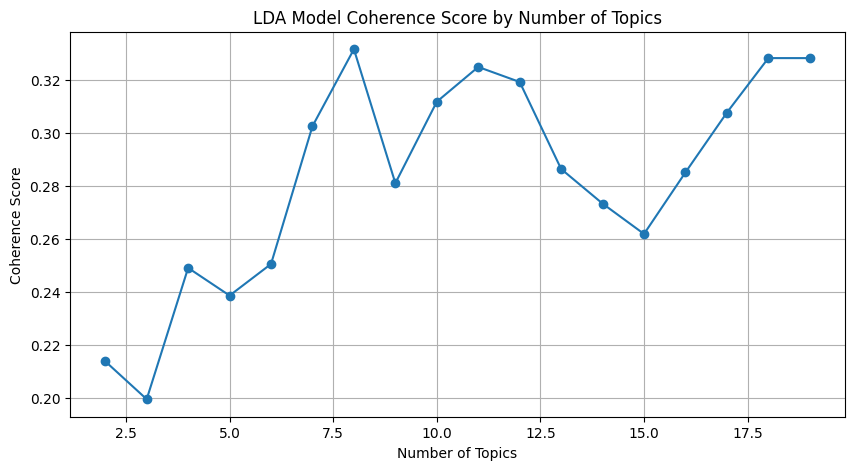

Optimal Number of Topics: 8


In [148]:
topics = []
score = []
lda_models = []

for i in range(2, 20): # comienzo con más de un topico
    lda_model = LdaMulticore(
        corpus=corpus,
        id2word=dictionary,
        iterations=100,
        num_topics=i,
        workers=4,
        passes=20,
        random_state=100
    )
    lda_models.append(lda_model)


    cm = CoherenceModel(
        model=lda_model,
        texts=df_text_voice['docs_trigram'],
        corpus=corpus,
        dictionary=dictionary,
        coherence='c_v'
    )
    topics.append(i)
    score.append(cm.get_coherence())
    print(f'Number of Topics: {i}, Coherence Score: {cm.get_coherence()}')

plt.figure(figsize=(10, 5))
plt.plot(topics, score, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('LDA Model Coherence Score by Number of Topics')
plt.grid(True)
plt.show()

# Select the model with the highest coherence score
optimal_index = score.index(max(score))
optimal_num_topics = topics[optimal_index]
optimal_lda_model = lda_models[optimal_index]
print(f'Optimal Number of Topics: {optimal_num_topics}')


In [15]:
sorted([(i, sc)for i, sc in enumerate(score)], key=lambda x: x[1], reverse=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(10, 0.3577750185627015),
 (8, 0.342699287563949),
 (7, 0.3364351316187385),
 (12, 0.33564183378471363),
 (16, 0.334799414415218),
 (9, 0.3331485707723442),
 (11, 0.3276587089134537),
 (14, 0.32715107195597215),
 (15, 0.3216620721431901),
 (17, 0.31881755132039324),
 (6, 0.31247151082375035),
 (13, 0.3074347877161457),
 (5, 0.29564948505950156),
 (4, 0.2891732281631236),
 (3, 0.26455679236391116),
 (1, 0.2434858313100184),
 (0, 0.23564336224382992),
 (2, 0.22787236238483377)]

In [136]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
lambd = 1 # agrega un specific valor metric value

all_topics = {}
num_topics = lda_model.num_topics
num_terms = 10

LDAvis_prepared = lda_display

for i in range(1, num_topics+1): # Indices are 1-based, not 0-based
    topic = LDAvis_prepared.topic_info[LDAvis_prepared.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd) + topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values
topics_df = pd.DataFrame(all_topics).T
print(topics_df)


                 0         1                    2               3           4  \
Topic 1      meter  auto_pay                  our         october         due   
Topic 2      where       buy                 find          really      things   
Topic 3        way      read                  our         problem        been   
Topic 4    balance    budget                usage  budget_billing    not_sure   
Topic 5     august      been                 july             gas        june   
Topic 6     charge       gas                usage          credit    delivery   
Topic 7       plan   billing       kilowatt_hours       statement          he   
Topic 8         um   service             thousand             off         six   
Topic 9    program        ui                 make             off     perfect   
Topic 10   perfect       off                 make            half      credit   
Topic 11      told        rd                light           check       meter   
Topic 12        ok   program

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
